In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
# Script definitions
# ------------------

# DAXPY - data_1.csv
# Histogram_1 - data_2.csv
# Histogram_2 - data_3.csv

data_file = '../../lab2/data/data_5.csv'
images_dir = '../images/conv2d_2/'

fixed_image = './images/grayscale_by_cols.pgm'


In [3]:
# Create the output directory if it doesn't exist
if not os.path.exists(images_dir):

	os.mkdir(images_dir)

else :

	os.system("rm -r " + images_dir)
	os.mkdir(images_dir)

In [4]:
# Load the data into a pandas DataFrame
data = pd.read_csv(data_file, sep=',', header=None)

# Add column names to the DataFrame
# DAXPY - printf("PAE,%d,%d,%d,%f,%f,%f,%f,%f,%f,%ld,%f,PAE\n", threadsPerBlock, blocksPerGrid, maxBlocksPerSM, occupancy, overhead, alloc_time, init_time, daxpy_time, total_time, n, alpha);
# Histogram - printf("\nPAE,%s,%d,%d,%d,%f,%f,%f,%f,%f,%f,%f,%f,%ld,PAE\n", imagePath, threadsPerBlock, blocksPerGrid, maxBlocksPerSM, occupancy, overhead, alloc_time, init_time, conv_time, hd_time, dh_time, total_time, imageSize);

data.columns = ['imagePath', 'overhead', 'alloc_time', 'init_time', 'conv_time', 'hd_time', 'dh_time', 'total_time', 'imageSize']

# Print total number of rows and columns in the DataFrame
print("Total rows: {0}".format(len(data)))

Total rows: 30


In [5]:
data = data[data['overhead'] < 0.1]

print("Total rows: {0}".format(len(data)))

Total rows: 30


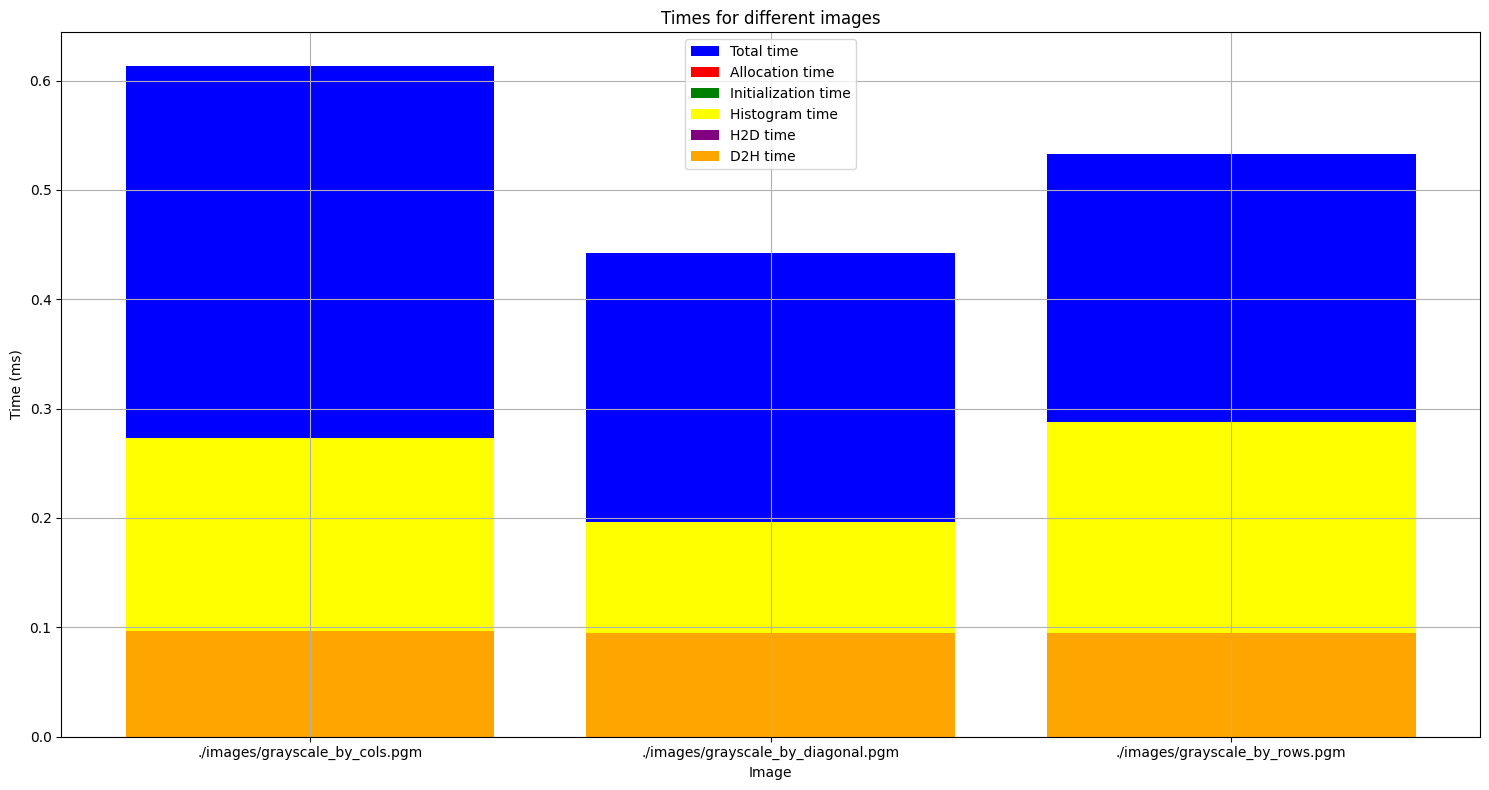

In [9]:
new_data = data

mean_alloc_time = new_data.groupby('imagePath')['alloc_time'].mean()
mean_init_time = new_data.groupby('imagePath')['init_time'].mean()
mean_conv_time = new_data.groupby('imagePath')['conv_time'].mean()
mean_hd_time = new_data.groupby('imagePath')['hd_time'].mean()
mean_dh_time = new_data.groupby('imagePath')['dh_time'].mean()
mean_total_time = new_data.groupby('imagePath')['total_time'].mean()

plt.figure(figsize=(15, 8))

plt.bar(mean_total_time.index, mean_total_time, color='blue', label='Total time')
plt.bar(mean_alloc_time.index, mean_alloc_time, color='red', label='Allocation time')
plt.bar(mean_init_time.index, mean_init_time, color='green', label='Initialization time')
plt.bar(mean_conv_time.index, mean_conv_time, color='yellow', label='Histogram time')
plt.bar(mean_hd_time.index, mean_hd_time, color='purple', label='H2D time')
plt.bar(mean_dh_time.index, mean_dh_time, color='orange', label='D2H time')

plt.xlabel('Image')
plt.ylabel('Time (ms)')

plt.title('Times for different images')

plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig(images_dir + '/execution_times.png')

In [16]:
finalData = []


ref_times = data.groupby('imagePath')['conv_time'].max()

for (image_value), group in data_filtered.groupby(['imagePath']):

	max_compute_time = group['conv_time'].max()
	max_total_time = group['total_time'].max()

	ref_time = ref_times.get(image_value, None)

	speedup = ref_time / max_compute_time

	# Secuential daxpy time 0.8514 seconds and total time 4.3128s
	# Histogram - 0.2045 seconds and 0.6341 seconds

	secuential_compute_speedup = 1.3064/ max_compute_time
	secuential_total_speedup =  1.6452/ max_total_time

	quality = 1 / max_compute_time

	finalData.append([image_value, max_compute_time, ref_time, speedup, quality, secuential_compute_speedup, secuential_total_speedup])

final_df = pd.DataFrame(finalData, columns=['imagePath', 'MaxTime', 'RefTime', 'Speedup', 'Quality', 'SecuentialComputeSpeedup', 'SecuentialTotalSpeedup'])

display(final_df)

# Generate table latex code for the final_df DataFrame fixed to 2 decimal places
final_df.to_latex(os.path.join(images_dir, 'final_df_npp.tex'), index=False, float_format="%.2f")

/tmp/ipykernel_63328/3531591864.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (image_value), group in data_filtered.groupby(['imagePath']):


,imagePath,MaxTime,RefTime,Speedup,Quality,SecuentialComputeSpeedup,SecuentialTotalSpeedup
0,./images/grayscale_by_cols.pgm,1.074431,1.074431,1.0,0.930726,1.215900,1.230200
1,./images/grayscale_by_diagonal.pgm,0.294855,0.294855,1.0,3.391503,4.430659,3.024143
2,./images/grayscale_by_rows.pgm,0.291910,0.291910,1.0,3.425716,4.475355,3.037425


/tmp/ipykernel_63328/3531591864.py:30: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  final_df.to_latex(os.path.join(images_dir, 'final_df_npp.tex'), index=False, float_format="%.2f")
